## imports

In [13]:
import pandas as pd
import datetime
import tqdm

## choose variables


In [14]:
filter_country = True
selected_country = 'Country A'

filter_vehiclegroup = True
selcted_vehiclegroup = 'vehiclegroup01' 

### wheel
use_all_features = True # if false, assign checkup_features here
checkup_features = ['quota__vehiclegroup01__aq'],['sales_flow_monthly__vehiclegroup01__cp8']
data_input = 'all' #all, internal, external
predict_future_values = False #after row 258

filename = 'run_'+selected_country+'_'+data_input+'_'

#methods
mean_per_month = True
median_per_month = True
interpolation_linear = True
interpolation_spline = True
fill_zero = True

In [15]:
df = pd.read_csv("../Data/kitCapstoneJan24_data.csv", sep=";")

df_country_a = df[df['countryname'] == selected_country]
df_country_a

,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Extract the rows for the other countries and additional columns
other_countries = df[df['countryname'] != 'Country A']
additional_columns = df.columns[4:]

# Create new columns for the transformed additional columns
for country in other_countries:
    for column in additional_columns:
        df['countryB_' + column] = other_countries[other_countries['countryname'] == 'Country B'][column]

df

#Get rows with for country A
if filter_country:
    df_country_a = df[df['countryname'] == selected_country]
    df_country_a
else:
    df_country_a = df
df_country_a = df
df_country_a


In [16]:
# add additional feature month_normalized
df_country_a['month_normalized'] = df_country_a['month'] % 12

df_country_a = df_country_a[['month_normalized','month', 'countryname'] + [col for col in df_country_a.columns if col not in ['month_normalized','month', 'countryname']]]

In [17]:

if filter_vehiclegroup:
    ## select vehiclegroups
    # delete all columns that are for a diffe
    df1 = df_country_a

    # create new dataframe with month and all columns containing vehiclegroup01
    df2 = df1.filter(regex=selcted_vehiclegroup)
    df2.head()

    # drop columns in df1 which contain vehiclegroup
    df3 = df1.drop(df1.filter(regex='vehiclegroup').columns, axis=1)
    df3.head()

    # merge df2 and df3 by index
    df4 = df2.merge(df3, left_index=True, right_index=True)
    df4.head()

    # is there a column month in df4?
    df4.columns.str.contains('month').any()
    # column month should be the first column, second column is countryname
    df4 = df4[['month_normalized','month', 'countryname'] + [col for col in df4.columns if col not in ['month_normalized','month', 'countryname']]]

    # drop rows after row 258
    #test = df4.drop(df4.index[258:])
    test = df4
else:
    test = df_country_a 

In [18]:
df_overall = test

In [19]:
df_overall

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,1,Country A,296.0,352.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Country A,414.0,372.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,Country A,405.0,604.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Country A,359.0,483.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,Country A,403.0,474.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,10,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,11,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# dataframe with first 18 columns (internal data)

if filter_vehiclegroup:
    df_internal = df_overall.iloc[:, :21]
    df_internal.head()
else:
    df_internal = df_overall.iloc[:, :951]
    df_internal.head()

df_internal.head()

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,...,leads__vehiclegroup01__won,leads__vehiclegroup01__first_touch_point,leads__vehiclegroup01__lost,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,premises__vehiclegroup01__flag_order_start,premises__vehiclegroup01__in_sales,premises__vehiclegroup01__flag_production_start,premises__vehiclegroup01__in_production,quota__vehiclegroup01__aq
0,1,1,Country A,296.0,352.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,81.0,NaN,NaN,NaN,NaN,NaN
1,2,2,Country A,414.0,372.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,4.0,130.0,NaN,NaN,NaN,NaN,NaN
2,3,3,Country A,405.0,604.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,2.0,145.0,NaN,NaN,NaN,NaN,NaN
3,4,4,Country A,359.0,483.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,2.0,183.0,NaN,NaN,NaN,NaN,NaN
4,5,5,Country A,403.0,474.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,4.0,201.0,NaN,NaN,NaN,NaN,NaN


In [21]:
if filter_vehiclegroup:
    df_external = test.iloc[:, 21:]
    df_external.loc[:, 'month_normalized'] = test['month_normalized']
    df_external.head()
else:
    df_external = test.iloc[:, 951:]
    df_external.loc[:, 'month_normalized'] = test['month_normalized']
    df_external.head()
df_external.head()

,global_consumer__alcoholic_beverages,global_consumer__apparel,global_consumer__apparel_footwear,global_consumer__appliances,global_consumer__automobiles,global_consumer__average_disposable_income_of_urban_households_nominal,global_consumer__average_disposable_income_of_urban_households_real,global_consumer__average_income,global_consumer__beer,global_consumer__building_materials_garden_supply,...,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi,month_normalized
0,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,46.394457,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [22]:
df_overall_future = df_overall.iloc[:259,]


# Assuming df_external_info is a DataFrame
nan_columns = df_overall_future.isna().any()
nan_counts = df_overall_future.isna().sum()


# Create a list of rows
rows = []
for col, count in nan_counts.items():
    if count > 50:
        row = {"name": col, "NaN Count": count}
        rows.append(row)

# Create a DataFrame
nan_info_df = pd.DataFrame(rows, columns=["name", "NaN Count"])

nan_info_df

nan_info_df.to_csv('../output_data/'+filename+datetime.datetime.now().strftime("%H%M")+'nan_list.csv')

# Create a list of rows
rows = []
for col, count in nan_counts.items():
    if count <= 50:
        row = {"name": col, "NaN Count": count}
        rows.append(row)

# Create a DataFrame
not_nan_info_df = pd.DataFrame(rows, columns=["name", "NaN Count"])

not_nan_info_df

not_nan_info_df.to_csv('../output_data/'+filename+datetime.datetime.now().strftime("%H%M")+'not_nan_list.csv')

In [23]:
country_a_y = df_country_a['sales_actuals_monthly__vehiclegroup01__orderintake']

### feature filling wheel

In [41]:
df_overall.iloc[258:, :]

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
258,7,259,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,8,260,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,9,261,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,10,262,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,11,263,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,10,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,11,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
import warnings
warnings.filterwarnings("ignore") #turn of warnings

print(data_input)

if data_input == 'all':
    input_df = df_overall
    print(input_df)
elif data_input == 'internal':
    input_df = df_internal
elif data_input == 'external':
    input_df = df_external

if not predict_future_values:
    input_df = df_overall.iloc[:258, :]#.head(258)  # Select the first 258 rows as the first part
    df_second_part = df_overall.iloc[258:, :]#tail(102)  # Select the last 102 rows as the second part
    print(df_second_part.shape)

if use_all_features:
    checkup_features = input_df.columns

# Create a progress bar
pbar = tqdm.tqdm(total=len(checkup_features))
for feature in checkup_features:
    #print(input_df[feature].isna().any(), feature)
    if input_df[feature].isna().any():
        if input_df[feature].isna().all():
            print(f"Column {feature} has only NaN values. Dropping it.")
            input_df.drop(columns=feature, axis=1, inplace=True)
            df_second_part.drop(columns=feature, axis=1, inplace=True)
        else:
            if mean_per_month:
                # add mean per month
                # Fill in missing values using the corresponding month values
                month_means = {}
                for i in range(len(input_df)):
                    month = input_df.iloc[i]['month_normalized']
                    month_values = input_df.loc[input_df['month_normalized'] == month, feature]
                    if not month_values.isnull().values.all():
                        month_means[month] = month_values.mean()

                # Fill in missing values using the corresponding month values
                input_df[feature+'_meanbymonth']=input_df[feature].loc[:].fillna(input_df['month_normalized'].map(month_means))

            if median_per_month:
                # add median per month
                # Fill in missing values using the corresponding month values
                month_medians = {}
                for i in range(len(input_df)):
                    month = input_df.iloc[i]['month_normalized']
                    month_values = input_df.loc[input_df['month_normalized'] == month, feature]
                    if not month_values.isnull().values.all():
                        month_medians[month] = month_values.median(skipna=True)
                
                input_df[feature + '_medianbymonth'] = (input_df[feature].loc[:].
                                                        fillna(input_df['month_normalized']
                                                            .map(month_medians)))

            if interpolation_linear:
                input_df[feature+'_interpolated_linear']=input_df[feature].interpolate(method='linear', limit_direction = 'both')

            if interpolation_spline:
                input_df[feature + '_interpolation_spline'] = input_df[feature].interpolate(method='spline', limit_direction = 'both', order=3)
        
            if fill_zero:
                input_df[feature+'_fill_zero']=input_df[feature].fillna(0)

            input_df.drop(columns=feature, inplace=True)
            df_second_part.drop(columns=feature, inplace=True)
    pbar.update(1)

if not predict_future_values:       
    input_df = pd.concat([input_df, df_second_part], axis=0)  # Concatenate the two DataFrames along the row axis


output_df = input_df

# Close the progress bar
pbar.close()

all
     month_normalized  month countryname  \
0                   1      1   Country A   
1                   2      2   Country A   
2                   3      3   Country A   
3                   4      4   Country A   
4                   5      5   Country A   
..                ...    ...         ...   
355                 8    356   Country A   
356                 9    357   Country A   
357                10    358   Country A   
358                11    359   Country A   
359                 0    360   Country A   

     sales_actuals_monthly__vehiclegroup01__orderintake  \
0                                                296.0    
1                                                414.0    
2                                                405.0    
3                                                359.0    
4                                                403.0    
..                                                 ...    
355                                                NaN

  1%|▏         | 21/1440 [00:02<03:37,  6.52it/s]

Column global_economy__bop_cap_account_bal_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_current_account_balance_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_direct_investment_asset_debit_capital_outflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_direct_investment_balance_or_net_fdi_net_capital_inflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_direct_investment_liability_or_fdi_credit_capital_inflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_factor_service_balance_net_foreign_investment_income_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_factor_service_exports_and_credits_investment_income_receipts_from_the_rest_of_the_world_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_factor_service_imports_and_debits_investment_income_payments_to_the_rest_of_the_world_us__u_s_dollar

 97%|█████████▋| 1397/1440 [00:02<00:00, 1614.07it/s]

Column registrations__vwm_luxus_maserati has only NaN values. Dropping it.
Column registrations__vwm_luxus_mclaren has only NaN values. Dropping it.
Column registrations__vwm_luxus_alpina has only NaN values. Dropping it.


100%|██████████| 1440/1440 [00:11<00:00, 125.43it/s] 


In [39]:
df_second_part

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,global_consumer__alcoholic_beverages,...,global_economy__unspecified_revenue_total_otherwise_current_of_gdp_unspecified_government__percentage,global_economy__user_cost_of_capital__percentage,global_economy__wages_and_salaries_gross_euro__euro,global_economy__wages_and_salaries_gross_lcu__chinese_renminbi,global_economy__wages_and_salaries_gross_lcu__euro,global_economy__wages_and_salaries_gross_us__u_s_dollar,global_economy__wholesale_producer_price_index_euro_basis__index,global_economy__wholesale_producer_price_index_us_basis__index,global_economy__wholesale_producer_price_index_year_on_year_percent_change__percent_change_year_ago,global_economy__working_age_population__persons


In [38]:
input_df.shape

(258, 1621)

In [26]:
feature

'registrations__buildtype_kombi'

In [27]:
#input_df['registrations__buildtype_kombi_meanbymonth']

In [28]:
output_df.to_csv('../output_data/'+filename+datetime.datetime.now().strftime("%H%M")+'_NaN_fillup.csv')

## NaN lists

hardcoded at the moment

# SHAP

In [29]:
import xgboost
import shap
from sklearn import metrics
import matplotlib

shap.initjs()

In [30]:
#X = output_df[:258]
X = output_df.iloc[49:258, ~output_df.columns.str.contains('sales_actuals_monthly__vehiclegroup01__orderintake')]

y = country_a_y[49:258]
#print(X)
# Replace countrynames with numbers 1 to 4
if 'countryname' in X.columns:
    countryMapping = {'Country A': 1, 'Country B': 2, 'Country C': 3, 'Country D': 4}
    X['countryNo'] = X['countryname'].map(countryMapping)
    X = X.drop('countryname', axis=1)

#print(X.dtypes)

#y= df_internal.iloc[:, 3]
y.describe()

count     209.000000
mean      297.200957
std       116.070137
min        40.000000
25%       215.000000
50%       280.000000
75%       350.000000
max      1000.000000
Name: sales_actuals_monthly__vehiclegroup01__orderintake, dtype: float64

In [31]:
model = xgboost.XGBRegressor().fit(X, y)

print('Accuracy Score of the Model is: ', model.score(X, y))

explainer = shap.Explainer(model)
shap_values = explainer(X)

Accuracy Score of the Model is:  0.9999999946620659


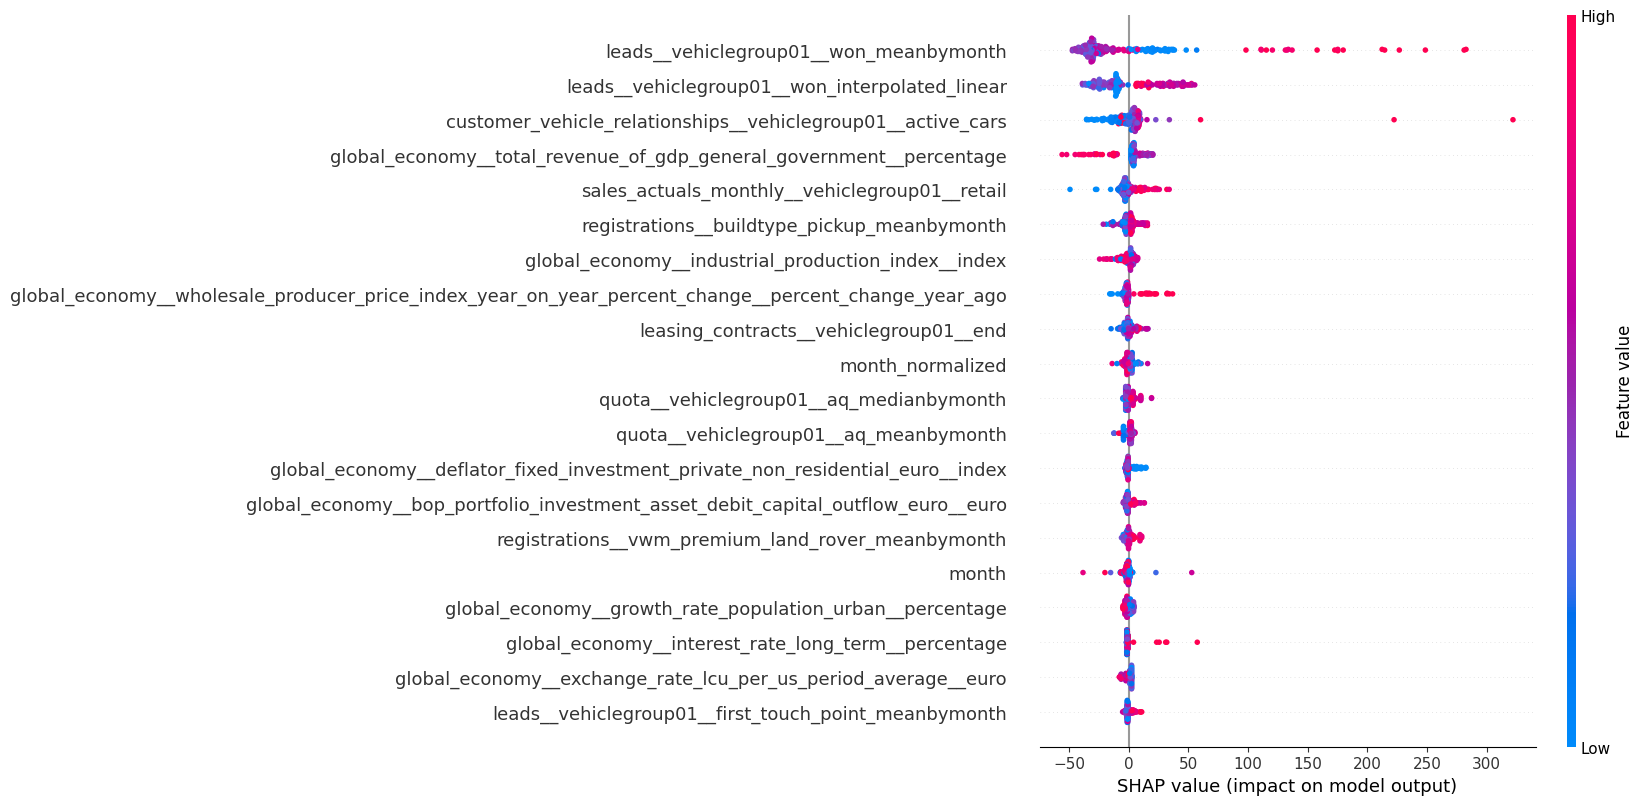

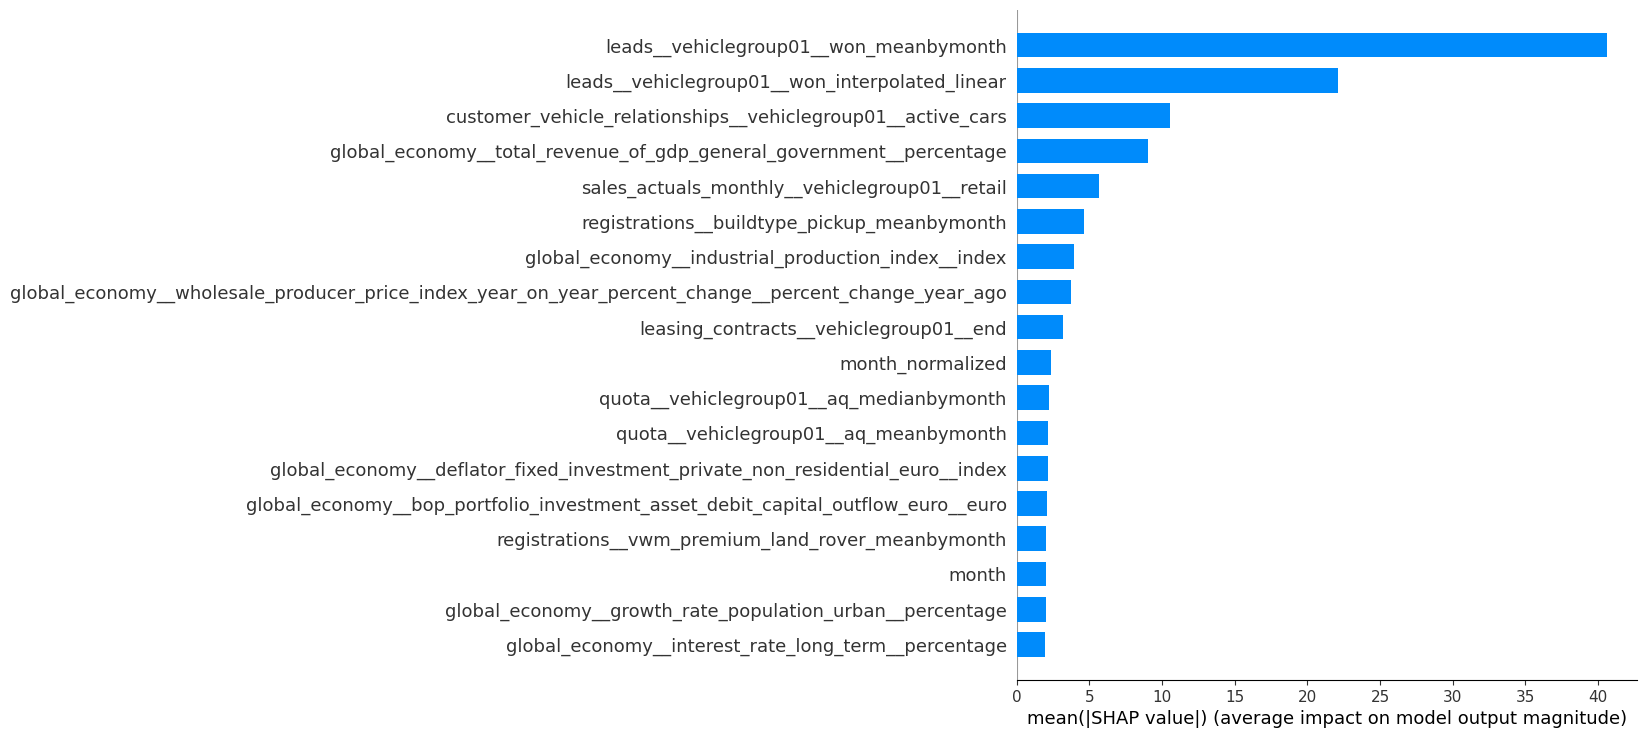

In [32]:
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type='bar', max_display=18)

In [33]:
#pd.DataFrame(shap_values.values[0], index = X.columns)

shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

# Calculate the mean absolute value for each feature
feature_importance = shap_df.abs().mean(axis=0)

# Create a DataFrame with feature names and their mean absolute SHAP values
feature_importance_df = pd.DataFrame({'Feature': feature_importance.index, 'Mean_SHAP': feature_importance.values})

# Sort the DataFrame based on mean absolute SHAP values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Mean_SHAP', ascending=False)

print(feature_importance_df)

                                                Feature  Mean_SHAP
1374             leads__vehiclegroup01__won_meanbymonth  40.616673
1376     leads__vehiclegroup01__won_interpolated_linear  22.075951
4     customer_vehicle_relationships__vehiclegroup01...  10.574327
1309  global_economy__total_revenue_of_gdp_general_g...   9.061353
2         sales_actuals_monthly__vehiclegroup01__retail   5.690792
...                                                 ...        ...
593   global_economy__exchange_rate_purchasing_power...   0.000000
591   global_economy__exchange_rate_purchasing_power...   0.000000
590   global_economy__exchange_rate_lcu_per_yen_peri...   0.000000
588   global_economy__exchange_rate_lcu_per_yen_peri...   0.000000
1619                                          countryNo   0.000000

[1620 rows x 2 columns]


In [34]:
# Assuming feature_importance_df is your original DataFrame
endings = ['_meanbymonth', '_medianbymonth', '_interpolated_linear', '_interpolation_spline', '_fill_zero']

def get_base_name(feature_name):
    for ending in endings:
        if ending in feature_name:
            return feature_name.replace(ending, '')
    return feature_name

rows_to_add = []
seen_base_names = set()

for _, row in feature_importance_df.iterrows():
    feature_name = str(row['Feature'])  # Ensure this matches your column name
    base_name = get_base_name(feature_name)

    if base_name not in seen_base_names:
        seen_base_names.add(base_name)
        rows_to_add.append(row)

# Create the new DataFrame from the accumulated rows
new_df = pd.DataFrame(rows_to_add, columns=feature_importance_df.columns)
new_df.reset_index(drop=True, inplace=True)

print(new_df)

new_df.to_csv('../output_data/'+filename+datetime.datetime.now().strftime("%H%M")+'value_importance_list.csv')

                                                Feature  Mean_SHAP
0                leads__vehiclegroup01__won_meanbymonth  40.616673
1     customer_vehicle_relationships__vehiclegroup01...  10.574327
2     global_economy__total_revenue_of_gdp_general_g...   9.061353
3         sales_actuals_monthly__vehiclegroup01__retail   5.690792
4           registrations__buildtype_pickup_meanbymonth   4.660532
...                                                 ...        ...
1403  global_economy__exchange_rate_purchasing_power...   0.000000
1404  global_economy__exchange_rate_purchasing_power...   0.000000
1405  global_economy__exchange_rate_lcu_per_yen_peri...   0.000000
1406  global_economy__exchange_rate_lcu_per_yen_peri...   0.000000
1407                                          countryNo   0.000000

[1408 rows x 2 columns]
